# Обучение случайного леса на числовых фичах

In [26]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
import numpy as np
from joblib import dump

In [2]:
data = pd.read_csv(
    '../data/processed/numerical_train.csv',
    index_col = 'pair_id'
)

In [3]:
X = data.drop(['is_duplicate'], axis = 1)
y = data.is_duplicate

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    random_state = 666,
    stratify = y,
    test_size = 0.2
)

In [11]:
# Grid of hyperparameters
grid = {
    'class_weight': [
        'balanced',
        'balanced_subsample'
    ],
    'criterion': [
        'gini',
        'entropy',
        'log_loss'
    ],
    'max_features': [
        'sqrt',
        'log2',
        None
    ]
}

In [12]:
model = RandomForestClassifier()

In [13]:
# Grid search of the best
# hyperparameters combination
g_search = GridSearchCV(
    estimator = model,
    param_grid = grid,
    n_jobs = -1,
    verbose = 3,
    refit = 'f1',
    cv = 3,
    scoring = [
        'accuracy',
        'precision',
        'recall',
        'f1',
        'roc_auc'
    ]
)

In [14]:
# Model training
g_search.fit(X_train, y_train)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'class_weight': ['balanced', 'balanced_subsample'],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None]},
             refit='f1',
             scoring=['accuracy', 'precision', 'recall', 'f1', 'roc_auc'],
             verbose=3)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


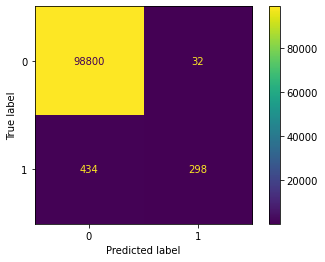

In [15]:
# Confusion matrix on test 
metrics.plot_confusion_matrix(
    g_search,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


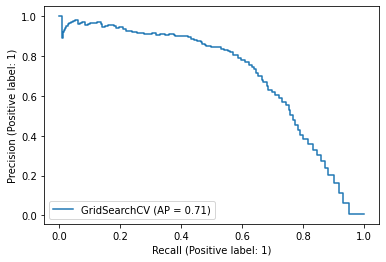

In [16]:
# Precision-Recall curve on test 
metrics.plot_precision_recall_curve(
    g_search,
    X_test,
    y_test
)

C:\Program Files\Python\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


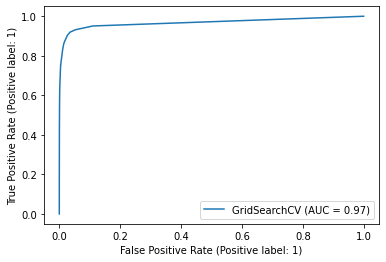

In [17]:
# ROC-AUC on test 
metrics.plot_roc_curve(
    g_search,
    X_test,
    y_test
)

In [18]:
# Metrics on test
print(metrics.classification_report(
    y_test,
    g_search.predict(X_test)
))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     98832
           1       0.90      0.41      0.56       732

    accuracy                           1.00     99564
   macro avg       0.95      0.70      0.78     99564
weighted avg       0.99      1.00      0.99     99564



In [31]:
# Best hyperparameters
print(pd.Series(g_search.best_params_))

class_weight    balanced
criterion        entropy
max_features        sqrt
dtype: object


In [33]:
# All estimators' performance
pd.DataFrame(g_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_max_features,params,split0_test_accuracy,split1_test_accuracy,...,split2_test_f1,mean_test_f1,std_test_f1,rank_test_f1,split0_test_roc_auc,split1_test_roc_auc,split2_test_roc_auc,mean_test_roc_auc,std_test_roc_auc,rank_test_roc_auc
0,138.668826,0.761491,7.189438,0.095406,balanced,gini,sqrt,"{'class_weight': 'balanced', 'criterion': 'gin...",0.994742,0.995194,...,0.505080,0.505156,0.023215,11,0.960208,0.970905,0.962035,0.964383,0.004672,10
1,138.815099,0.753257,7.015574,0.186182,balanced,gini,log2,"{'class_weight': 'balanced', 'criterion': 'gin...",0.994817,0.995194,...,0.498534,0.505837,0.018215,10,0.959609,0.966340,0.965027,0.963659,0.002913,12
2,498.677717,10.108454,7.844688,0.030561,balanced,gini,None,"{'class_weight': 'balanced', 'criterion': 'gin...",0.994576,0.994870,...,0.472464,0.484342,0.015944,18,0.949837,0.957676,0.950481,0.952665,0.003553,18
3,126.645974,2.249515,7.846017,0.266208,balanced,entropy,sqrt,"{'class_weight': 'balanced', 'criterion': 'ent...",0.994923,0.995247,...,0.512266,0.518722,0.017327,1,0.964223,0.969391,0.965870,0.966495,0.002155,5
4,127.494044,4.874663,7.894221,0.173625,balanced,entropy,log2,"{'class_weight': 'balanced', 'criterion': 'ent...",0.994870,0.995111,...,0.511896,0.512226,0.011623,8,0.961538,0.970729,0.966971,0.966413,0.003773,6
5,417.126406,6.560087,7.882134,0.491783,balanced,entropy,None,"{'class_weight': 'balanced', 'criterion': 'ent...",0.994622,0.995021,...,0.493950,0.499422,0.019435,12,0.956811,0.966957,0.955851,0.959873,0.005025,16
6,125.015339,2.038241,7.948742,0.035487,balanced,log_loss,sqrt,"{'class_weight': 'balanced', 'criterion': 'log...",0.994893,0.995179,...,0.515896,0.518163,0.012279,2,0.964979,0.974679,0.967070,0.968909,0.004168,1
7,122.633373,2.150714,7.825405,0.090033,balanced,log_loss,log2,"{'class_weight': 'balanced', 'criterion': 'log...",0.994900,0.995247,...,0.501458,0.516168,0.019515,6,0.964664,0.972216,0.965747,0.967543,0.003334,3
8,420.672143,9.205833,7.534518,0.064430,balanced,log_loss,None,"{'class_weight': 'balanced', 'criterion': 'log...",0.994591,0.994953,...,0.494624,0.494284,0.015489,16,0.961875,0.966014,0.956951,0.961613,0.003704,13
9,147.276916,1.774624,8.366294,0.111159,balanced_subsample,gini,sqrt,"{'class_weight': 'balanced_subsample', 'criter...",0.994848,0.995051,...,0.492669,0.499408,0.009592,13,0.961932,0.967218,0.968270,0.965807,0.002773,8


In [27]:
# Saving model
dump(g_search.best_estimator_, '../models/rf.joblib')

['../models/rf.joblib']